In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# df = pd.read_csv("Test_Short_leads.csv")
df = pd.read_csv("/content/drive/MyDrive/Short_leads.csv")

df = df.drop('Unnamed: 0', axis=1)
df['Note'].fillna('', inplace=True)

# 특정 조건을 만족하는 행을 찾아 3배로 복사하기
cod = (df['Status_Text'] == 'Converted')
select = df[cod].copy()  # 'Converted'인 행을 복사하여 새로운 데이터프레임 생성

# 복사된 행을 원래 데이터프레임에 2번 추가 (원본 포함 총 3번)
df = pd.concat([df] + [select] * 2, ignore_index=True)

df = df.drop(df[df['Status_Text'] == '0'].index)
df['Status_Text'] = df['Status_Text'].map({'Closed': 2, 'Unqualified': 1, 'Converted': 4, 'Qualified': 3, 'Sales Rejected': 0})

df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).fillna('')
df[df.select_dtypes(include=['float64']).columns] = df.select_dtypes(include=['float64']).fillna(0)

df

,Name,Account_Party_Name,Main_Contact_Person_Name,Company,Status_Text,Reason_Code_Text,Source_Text,Priority_Text,Start_Date,End_Date,Owner_Party_Name,Marketing_Unit_Name,Sales_Unit_Name,Sales_Territory_Name,Note
0,Member Registration Fluid Power Target Account,Natalie Skinner,Michael Lee,True,2.0,No further action required,Web Member Registration,Normal,2021-05-20,9999-12-31,Lawrence Mullins,,TSS Italy,ICO - Construction / Agricult. Equip,This new contact from a Fluid Power target acc...
1,Web Request,Laura Garcia,Lisa Spencer,True,4.0,,Website Contact Form,Normal,2023-06-15,2023-07-15,Angela Smith,,,,"Dario,\n\nI am reaching out to you this mornin..."
2,Electronic Catalog RfQ,Ashley Mitchell,John Joseph,True,2.0,No Response,e-Catalog,Normal,2023-06-15,2023-07-15,Laura Miles,,,,No response so will close
3,Member Registration,Patrick Hill,Jessica Graham,True,2.0,No Potential,Web Member Registration,Normal,2023-06-15,2023-07-15,Alicia Craig,,TSS Automotive Hub Europe,G11 - Bosch Automotive HUB,\n This new contact from an existing priority ...
4,Sealing Solutions Configurator RFQ,Benjamin Chang,Robert Heath,True,1.0,,Sealing Solutions Configurator,Normal,2023-06-15,2023-07-15,Jeremy Pearson,,,,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98885,前卫表业_20210510_01,John Meadows,Christine Mason,True,4.0,,Sales,Normal,5/10/2021,6/9/2021,Mr. Steve Thomas,Marketing Intelligence China,,,重庆前卫克罗姆表业有限责任公司企 业 简 介重庆前卫克罗姆表业有限责任公司是由国家大型企业中...
98886,Motor_EPPropulsion_20210528,Jennifer Rose,Lindsey French,True,4.0,,Sales,Normal,5/30/2021,6/29/2021,Ruth Allen,,,,1. Project/Application : electric motor for bo...
98887,Enq- 00726,Jeffrey Woods,Ryan Mullen,True,4.0,,Sales,Normal,6/9/2021,7/9/2021,Stephanie Osborn,,TSS India,FLM - Fluid Power – Machine Tools,RFQ raised
98888,Web Request,Sandra Stone,Brian Crawford,True,4.0,,Website Contact Form,Normal,6/23/2021,7/23/2021,Frank Robinson,,,TR3 - Egean,"Hello,\n\nI need a price and delivery on the p..."


In [4]:
df['Status_Text'].value_counts()

2.0    56990
4.0    18969
1.0    15864
3.0     5268
0.0     1798
Name: Status_Text, dtype: int64

In [5]:
df

,Name,Account_Party_Name,Main_Contact_Person_Name,Company,Status_Text,Reason_Code_Text,Source_Text,Priority_Text,Start_Date,End_Date,Owner_Party_Name,Marketing_Unit_Name,Sales_Unit_Name,Sales_Territory_Name,Note
0,Member Registration Fluid Power Target Account,Natalie Skinner,Michael Lee,True,2.0,No further action required,Web Member Registration,Normal,2021-05-20,9999-12-31,Lawrence Mullins,,TSS Italy,ICO - Construction / Agricult. Equip,This new contact from a Fluid Power target acc...
1,Web Request,Laura Garcia,Lisa Spencer,True,4.0,,Website Contact Form,Normal,2023-06-15,2023-07-15,Angela Smith,,,,"Dario,\n\nI am reaching out to you this mornin..."
2,Electronic Catalog RfQ,Ashley Mitchell,John Joseph,True,2.0,No Response,e-Catalog,Normal,2023-06-15,2023-07-15,Laura Miles,,,,No response so will close
3,Member Registration,Patrick Hill,Jessica Graham,True,2.0,No Potential,Web Member Registration,Normal,2023-06-15,2023-07-15,Alicia Craig,,TSS Automotive Hub Europe,G11 - Bosch Automotive HUB,\n This new contact from an existing priority ...
4,Sealing Solutions Configurator RFQ,Benjamin Chang,Robert Heath,True,1.0,,Sealing Solutions Configurator,Normal,2023-06-15,2023-07-15,Jeremy Pearson,,,,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98885,前卫表业_20210510_01,John Meadows,Christine Mason,True,4.0,,Sales,Normal,5/10/2021,6/9/2021,Mr. Steve Thomas,Marketing Intelligence China,,,重庆前卫克罗姆表业有限责任公司企 业 简 介重庆前卫克罗姆表业有限责任公司是由国家大型企业中...
98886,Motor_EPPropulsion_20210528,Jennifer Rose,Lindsey French,True,4.0,,Sales,Normal,5/30/2021,6/29/2021,Ruth Allen,,,,1. Project/Application : electric motor for bo...
98887,Enq- 00726,Jeffrey Woods,Ryan Mullen,True,4.0,,Sales,Normal,6/9/2021,7/9/2021,Stephanie Osborn,,TSS India,FLM - Fluid Power – Machine Tools,RFQ raised
98888,Web Request,Sandra Stone,Brian Crawford,True,4.0,,Website Contact Form,Normal,6/23/2021,7/23/2021,Frank Robinson,,,TR3 - Egean,"Hello,\n\nI need a price and delivery on the p..."


In [6]:
for i in range(0, 14):
    print(df.columns[i])

Name
Account_Party_Name
Main_Contact_Person_Name
Company
Status_Text
Reason_Code_Text
Source_Text
Priority_Text
Start_Date
End_Date
Owner_Party_Name
Marketing_Unit_Name
Sales_Unit_Name
Sales_Territory_Name


In [7]:
def create_sentence(df):
        return "Name is '{}'. Party name is '{}'. Main contact person is '{}'. My company is '{}'. Reason is '{}'. I find this at '{}', and its priority is '{}'. Owner Party name is '{}'. Our sales unit is '{}', and territory is '{}'. Here is our note. '{}'".format(
        df['Name'],
        df['Account_Party_Name'],
        df['Main_Contact_Person_Name'],
        df['Company'],
        df['Reason_Code_Text'],
        df['Source_Text'],
        df['Priority_Text'],
        df['Owner_Party_Name'],
        df['Sales_Unit_Name'],
        df['Sales_Territory_Name'],
        df['Note']
    )

In [8]:
df['New_Column'] = df.apply(create_sentence, axis=1)
t_df = df[['Status_Text', 'New_Column']].copy()
t_df = t_df.rename(columns={'Status_Text': 'Status'})
t_df = t_df.rename(columns={'New_Column': 'Text'})

# 행을 무작위로 섞기
t_df = t_df.sample(frac=1, random_state=42)  # random_state는 재현 가능성을 위한 시드값, 원하는 값으로 설정

In [9]:
t_df

,Status,Text
71501,3.0,Name is 'Taichi Yamamoto'. Party name is 'Kim ...
5854,2.0,Name is 'Manufacturing of Custom Rubber Compon...
56039,1.0,Name is 'Member Registration Energy Oil & Gas ...
27409,2.0,Name is 'Web Request'. Party name is 'Debra Va...
68362,2.0,Name is 'Material Quote'. Party name is 'Gordo...
...,...,...
6265,2.0,Name is 'IFPE/CONEXPO 2023'. Party name is 'Co...
54887,2.0,Name is 'Web Request'. Party name is 'Brittany...
76821,2.0,Name is 'COMPAMED 2019'. Party name is 'Jorge ...
860,3.0,Name is 'Manufacturing of Custom Rubber Compon...


In [10]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98889 entries, 71501 to 15795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Status  98889 non-null  float64
 1   Text    98889 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [11]:
# '컬럼1' 값이 1인 행을 선택하고 해당 열 값을 가져오기
filtered_rows = t_df[t_df['Status'] == 4]
selected_column_values = filtered_rows['Text'].sample().values[0]

print(selected_column_values)

Name is 'WorkBoat Show'. Party name is 'Brianna George'. Main contact person is 'Vanessa Moore'. My company is 'True'. Reason is ''. I find this at 'Trade Show', and its priority is 'Normal'. Owner Party name is 'Angela Robinson'. Our sales unit is '', and territory is ''. Here is our note. 'Business type: Couplings, Clutches & Brakes -  Notes: Send profile seal capabilities for military - Status notes: Workboat presentation send'


In [13]:
import os
import random
import numpy as np
import torch

# 시드설정
SEED = 123

def seed_everything(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(SEED)

In [14]:
from torchtext.data.utils import get_tokenizer

# 토큰 생성
tokenizer = get_tokenizer('basic_english')

In [15]:
from torchtext.vocab import build_vocab_from_iterator

def yield_tokens(sentences):
    for text in sentences:
        yield tokenizer(text)

In [16]:
vocab = build_vocab_from_iterator(yield_tokens(t_df['Text'].tolist()), # 텍스트 Iterator
                                  specials=['<UNK>'],                    # 스페셜 토큰
                                  min_freq=2,                            # 최소 빈도 토큰
                                  max_tokens=1000,                       # 최대 토큰 개수
                                 )

vocab.set_default_index(vocab['<UNK>'])

In [17]:
# 전체 단어사전의 개수 출력
len(vocab)

1000

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(t_df['Text'], t_df['Status'],
                                                    stratify=t_df['Status'],
                                                    test_size=0.2,
                                                    random_state=SEED
                                                   )

In [19]:
from torch.utils.data import DataLoader, Dataset
from torchtext.vocab import build_vocab_from_iterator


class CustomDataset(Dataset):
    def __init__(self, texts, labels, vocab, tokenizer):
        super().__init__()
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.tokenizer = tokenizer


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        return self.vocab(self.tokenizer(text)), label

In [20]:
# Custom Dataset 생성
train_ds = CustomDataset(x_train, y_train, vocab=vocab, tokenizer=tokenizer)
valid_ds = CustomDataset(x_test, y_test, vocab=vocab, tokenizer=tokenizer)

In [21]:
# 1개의 데이터 추출
text, label = next(iter(train_ds))
len(text), label

(89, 2.0)

In [22]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [23]:
def collate_batch(batch, max_sequence_length):
    label_list, text_list = [], []

    for text, label in batch:
        # 최대 문장길이를 넘어가는 단어는 제거합니다.
        processed_text = torch.tensor(text[:max_sequence_length], dtype=torch.int64)
        text_list.append(processed_text)
        label_list.append(label)

    label_list = torch.tensor(label_list, dtype=torch.int64)

    # padding을 주어 짧은 문장에 대한 길이를 맞춥니다.
    text_list = pad_sequence(text_list, batch_first=True, padding_value=0)

    return text_list.to(device), label_list.to(device)

In [24]:
# 한 문장에 최대 포함하는 단어의 개수를 지정합니다.
MAX_SEQUENCE_LENGTH = 1000

train_loader = DataLoader(train_ds,
                          batch_size=32,
                          shuffle=True,
                          collate_fn=lambda x: collate_batch(x, MAX_SEQUENCE_LENGTH))

valid_loader = DataLoader(valid_ds,
                          batch_size=32,
                          shuffle=False,
                          collate_fn=lambda x: collate_batch(x, MAX_SEQUENCE_LENGTH))

In [25]:
x, y = next(iter(train_loader))
x = x.to(device)
y = y.to(device)

x.shape, y.shape
# (batch_size, seq_length), (batch_size)

(torch.Size([32, 403]), torch.Size([32]))

In [26]:
x

tensor([[5, 3, 1,  ..., 0, 0, 0],
        [5, 3, 1,  ..., 0, 0, 0],
        [5, 3, 1,  ..., 0, 0, 0],
        ...,
        [5, 3, 1,  ..., 0, 0, 0],
        [5, 3, 1,  ..., 0, 0, 0],
        [5, 3, 1,  ..., 0, 0, 0]], device='cuda:0')

In [27]:
NUM_VOCAB = len(vocab)
NUM_VOCAB

1000

In [28]:
# Embedding: (vocab_size, embedding_dim)
EMBEDDING_DIM = 30  # Dimension을 30 차원으로 설정(hyper-parameter)
embedding = nn.Embedding(len(vocab), EMBEDDING_DIM).to(device)

In [29]:
# x : (batch_size, seq_length)
embedding_out = embedding(x)
embedding_out.shape
# embedding_out: (batch_size, seq_length, embedding_dim)

torch.Size([32, 403, 30])

In [30]:
EMBEDDING_DIM = 30 # input_size: embedding_dim(임베딩 차원)
HIDDEN_SIZE   = 64 # hidden_size: 추출할 특성의 수(hyper-parameter)
NUM_LAYERS    = 1  # LSTM Stacking Layer 수
BIDIRECTIONAL = 2  # 양방향 특성 추출: True(2), False(1)

BATCH_SIZE    = x.size(0)
SEQ_LENGTH    = x.size(1)
print('BATCH_SIZE: ', BATCH_SIZE)
print('SEQ_LENGTH: ', SEQ_LENGTH)

BATCH_SIZE:  32
SEQ_LENGTH:  403


In [31]:
lstm = nn.LSTM(input_size=EMBEDDING_DIM, hidden_size=HIDDEN_SIZE, batch_first=True, device=device)
lstm

LSTM(30, 64, batch_first=True)

In [32]:
# initial weights 초기화
h_0 = torch.zeros(NUM_LAYERS*BIDIRECTIONAL, SEQ_LENGTH, HIDDEN_SIZE).to(device)
c_0 = torch.zeros(NUM_LAYERS*BIDIRECTIONAL, SEQ_LENGTH, HIDDEN_SIZE).to(device)

In [33]:
embedding_out.shape

torch.Size([32, 403, 30])

In [34]:
def EmbeddingLSTM(x, vocab_size, embedding_dim, hidden_size, bidirectional, num_layers, device):
    '''
    x             : 데이터 입력 (batch_size, seq_length)
    vocab_size    : 단어사전의 개수
    embedding_dim : 임베딩 차원
    hidden_size   : 특성추출의 개수(hyper-parameter)
    bidirectional : 양방향 특성 추출: 양방향(True), 단방향(False)
    num_layers    : Stacking LSTM 레이어 수, 기본: 1
    '''
    x = x.to(device)
    batch_size = x.size(0)

    print(f'===== Part1. 입력(x) =====\n')
    print(f'입력(x)의 차원(batch_size({batch_size}), seq_length({x.size(1)}))')
    print(f'{x.shape}\n')

    embedding = nn.Embedding(vocab_size, embedding_dim, device=device)
    embedding_out = embedding(x)
    print(f'===== Part2. Embedding =====\n')
    print(f'(batch_size({batch_size}), seq_length({x.size(1)}), embedding_dim({embedding_dim}))')
    print(f'{embedding_out.shape}')

    lstm = nn.LSTM(input_size=embedding_dim,
                   hidden_size=hidden_size,
                   num_layers=num_layers,
                   bidirectional=bidirectional,
                   batch_first=True,
                   device=device
                  )

    bidi = 2 if bidirectional else 1

    out, (h, c) = lstm(embedding_out)
    print()
    print(f'===== Part3. LSTM =====\n')
    print('out, (h, c) = lstm(x)\n')
    print('LSTM output')
    print(f'(batch_size({x.size(0)}), seq_length({x.size(1)}), hidden_size({hidden_size})*bidirectional({bidi}))')
    print(f'{out.shape}\n')
    print('==='*8)
    print('\n(hidden, cell) state\n')
    print(f'(num_layers({num_layers})*bidirectional({bidi}), batch_size({batch_size}), hidden_size({hidden_size}))')
    print(f'{h.shape}\n')
    print('==='*8)

In [35]:
EmbeddingLSTM(x,
              vocab_size=len(vocab),
              embedding_dim=30,
              hidden_size=64,
              bidirectional=True,
              num_layers=2,
              device=device
             )

===== Part1. 입력(x) =====

입력(x)의 차원(batch_size(32), seq_length(403))
torch.Size([32, 403])

===== Part2. Embedding =====

(batch_size(32), seq_length(403), embedding_dim(30))
torch.Size([32, 403, 30])

===== Part3. LSTM =====

out, (h, c) = lstm(x)

LSTM output
(batch_size(32), seq_length(403), hidden_size(64)*bidirectional(2))
torch.Size([32, 403, 128])


(hidden, cell) state

(num_layers(2)*bidirectional(2), batch_size(32), hidden_size(64))
torch.Size([4, 32, 64])



In [36]:
from tqdm import tqdm  # Progress Bar 출력
import numpy as np
import torch.nn as nn
import torch.optim as optim


class TextClassificationModel(nn.Module):
    def __init__(self, num_classes, vocab_size, embedding_dim, hidden_size, num_layers, bidirectional=True, drop_prob=0.2):
        super(TextClassificationModel, self).__init__()
        self.num_classes = num_classes
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = 2 if bidirectional else 1

        self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                      embedding_dim=embedding_dim)

        self.lstm = nn.LSTM(input_size=embedding_dim,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            bidirectional=bidirectional,
                           )

        self.dropout = nn.Dropout(drop_prob)

        self.relu = nn.ReLU()

        self.fc = nn.Linear(hidden_size*self.bidirectional, hidden_size)
        self.output = nn.Linear(hidden_size, num_classes)

    def init_hidden_and_cell_state(self, batch_size, device):
        # LSTM 입력시 초기 Cell 에 대한 가중치 초기화를 진행합니다.
        # (num_layers*bidirectional, batch_size, hidden_size)
        self.hidden_and_cell = (
            torch.zeros(self.num_layers*self.bidirectional, batch_size, self.hidden_size).to(device),
            torch.zeros(self.num_layers*self.bidirectional, batch_size, self.hidden_size).to(device),
        )

    def forward(self, x):
        x = self.embedding(x)
        output, (h, c) = self.lstm(x)
        # (batch_size, seq_length, hidden_size*bidirectional)
        # last sequence 의 (batch_size, hidden_size*bidirectional)
        h = output[:, -1, :]
        o = self.dropout(h)
        o = self.relu(self.fc(o))
        o = self.dropout(o)
        return self.output(o)

In [37]:
config = {
    'num_classes': 5,
    'vocab_size': len(vocab),
    'embedding_dim': 32,
    'hidden_size': 64,
    'num_layers': 2,
    'bidirectional': True,
}

model = TextClassificationModel(**config)
model.to(device)

TextClassificationModel(
  (embedding): Embedding(1000, 32)
  (lstm): LSTM(32, 64, num_layers=2, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (relu): ReLU()
  (fc): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=5, bias=True)
)

In [38]:
# loss 정의: CrossEntropyLoss
loss_fn = nn.CrossEntropyLoss()

# 옵티마이저 정의: bert.paramters()와 learning_rate 설정
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [39]:
def model_train(model, data_loader, loss_fn, optimizer, device):
    # 모델을 훈련모드로 설정합니다. training mode 일 때 Gradient 가 업데이트 됩니다. 반드시 train()으로 모드 변경을 해야 합니다.
    model.train()

    # loss와 accuracy 계산을 위한 임시 변수 입니다. 0으로 초기화합니다.
    running_loss = 0
    corr = 0
    counts = 0

    # 예쁘게 Progress Bar를 출력하면서 훈련 상태를 모니터링 하기 위하여 tqdm으로 래핑합니다.
    prograss_bar = tqdm(data_loader, unit='batch', total=len(data_loader), mininterval=1)

    # mini-batch 학습을 시작합니다.
    for idx, (txt, lbl) in enumerate(prograss_bar):
        # txt, lbl 데이터를 device 에 올립니다. (cuda:0 혹은 cpu)
        txt = txt.to(device)
        lbl = lbl.to(device)

        # 누적 Gradient를 초기화 합니다.
        optimizer.zero_grad()

        # LSTM Weight 초기화
        model.init_hidden_and_cell_state(len(txt), device)

        # Forward Propagation을 진행하여 결과를 얻습니다.
        output = model(txt)

        # 손실함수에 output, lbl 값을 대입하여 손실을 계산합니다.
        loss = loss_fn(output, lbl)

        # 오차역전파(Back Propagation)을 진행하여 미분 값을 계산합니다.
        loss.backward()

        # 계산된 Gradient를 업데이트 합니다.
        optimizer.step()

        # Probability Max index 를 구합니다.
        output = output.argmax(dim=1)

        # 정답 개수를 구합니다.
        corr += (output == lbl).sum().item()
        counts += len(lbl)

        # batch 별 loss 계산하여 누적합을 구합니다.
        running_loss += loss.item()

        # 프로그레스바에 학습 상황 업데이트
        prograss_bar.set_description(f"training loss: {running_loss/(idx+1):.5f}, training accuracy: {corr / counts:.5f}")

    # 누적된 정답수를 전체 개수로 나누어 주면 정확도가 산출됩니다.
    acc = corr / len(data_loader.dataset)

    # 평균 손실(loss)과 정확도를 반환합니다.
    # train_loss, train_acc
    return running_loss / len(data_loader), acc

In [40]:
def model_evaluate(model, data_loader, loss_fn, device):
    # model.eval()은 모델을 평가모드로 설정을 바꾸어 줍니다.
    # dropout과 같은 layer의 역할 변경을 위하여 evaluation 진행시 꼭 필요한 절차 입니다.
    model.eval()

    # Gradient가 업데이트 되는 것을 방지 하기 위하여 반드시 필요합니다.
    with torch.no_grad():
        # loss와 accuracy 계산을 위한 임시 변수 입니다. 0으로 초기화합니다.
        corr = 0
        running_loss = 0

        # 배치별 evaluation을 진행합니다.
        for txt, lbl in data_loader:
            # txt, lbl 데이터를 device 에 올립니다. (cuda:0 혹은 cpu)
            txt = txt.to(device)
            lbl = lbl.to(device)

            # LSTM Weight 초기화
            model.init_hidden_and_cell_state(len(txt), device)

            # 모델에 Forward Propagation을 하여 결과를 도출합니다.
            output = model(txt)

            # 검증 손실을 구합니다.
            loss = loss_fn(output, lbl)

            # Probability Max index 를 구합니다.
            output = output.argmax(dim=1)

            # 정답 개수를 구합니다.
            corr += (output == lbl).sum().item()

            # batch 별 loss 계산하여 누적합을 구합니다.
            running_loss += loss.item()

        # validation 정확도를 계산합니다.
        # 누적한 정답숫자를 전체 데이터셋의 숫자로 나누어 최종 accuracy를 산출합니다.
        acc = corr / len(data_loader.dataset)

        # 결과를 반환합니다.
        # val_loss, val_acc
        return running_loss / len(data_loader), acc

In [41]:
# 최대 Epoch을 지정합니다.
num_epochs = 15

# 학습 결과를 저장할 리스트
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# checkpoint로 저장할 모델의 이름을 정의 합니다.
model_name = 'LSTM-Text-Classification'

min_loss = np.inf

# Epoch 별 훈련 및 검증을 수행합니다.
for epoch in range(num_epochs):
    # Model Training
    # 훈련 손실과 정확도를 반환 받습니다.
    train_loss, train_acc = model_train(model, train_loader, loss_fn, optimizer, device)

    # 검증 손실과 검증 정확도를 반환 받습니다.
    val_loss, val_acc = model_evaluate(model, valid_loader, loss_fn, device)

    # 리스트에 결과 추가
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # val_loss 가 개선되었다면 min_loss를 갱신하고 model의 가중치(weights)를 저장합니다.
    if val_loss < min_loss:
        print(f'[INFO] val_loss has been improved from {min_loss:.5f} to {val_loss:.5f}. Saving Model!')
        min_loss = val_loss
        torch.save(model.state_dict(), f'{model_name}.pth')

    # Epoch 별 결과를 출력합니다.
    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f}')

training loss: 1.16561, training accuracy: 0.57592: 100%|██████████| 2473/2473 [00:41<00:00, 60.11batch/s]


[INFO] val_loss has been improved from inf to 1.15628. Saving Model!
epoch 01, loss: 1.16561, acc: 0.57592, val_loss: 1.15628, val_accuracy: 0.57630


training loss: 1.15910, training accuracy: 0.57628: 100%|██████████| 2473/2473 [00:40<00:00, 60.41batch/s]


[INFO] val_loss has been improved from 1.15628 to 1.15383. Saving Model!
epoch 02, loss: 1.15910, acc: 0.57628, val_loss: 1.15383, val_accuracy: 0.57630


training loss: 1.15560, training accuracy: 0.57617: 100%|██████████| 2473/2473 [00:39<00:00, 62.66batch/s]


[INFO] val_loss has been improved from 1.15383 to 1.14387. Saving Model!
epoch 03, loss: 1.15560, acc: 0.57617, val_loss: 1.14387, val_accuracy: 0.57630


training loss: 0.65436, training accuracy: 0.76077: 100%|██████████| 2473/2473 [00:39<00:00, 61.96batch/s]


[INFO] val_loss has been improved from 1.14387 to 0.38347. Saving Model!
epoch 04, loss: 0.65436, acc: 0.76077, val_loss: 0.38347, val_accuracy: 0.86343


training loss: 0.36718, training accuracy: 0.87676: 100%|██████████| 2473/2473 [00:40<00:00, 61.76batch/s]


[INFO] val_loss has been improved from 0.38347 to 0.30959. Saving Model!
epoch 05, loss: 0.36718, acc: 0.87676, val_loss: 0.30959, val_accuracy: 0.89787


training loss: 0.32575, training accuracy: 0.89422: 100%|██████████| 2473/2473 [00:39<00:00, 62.13batch/s]


[INFO] val_loss has been improved from 0.30959 to 0.29315. Saving Model!
epoch 06, loss: 0.32575, acc: 0.89422, val_loss: 0.29315, val_accuracy: 0.90444


training loss: 0.28900, training accuracy: 0.90620: 100%|██████████| 2473/2473 [00:39<00:00, 62.24batch/s]


[INFO] val_loss has been improved from 0.29315 to 0.27611. Saving Model!
epoch 07, loss: 0.28900, acc: 0.90620, val_loss: 0.27611, val_accuracy: 0.90757


training loss: 0.26735, training accuracy: 0.91322: 100%|██████████| 2473/2473 [00:40<00:00, 61.42batch/s]


[INFO] val_loss has been improved from 0.27611 to 0.26930. Saving Model!
epoch 08, loss: 0.26735, acc: 0.91322, val_loss: 0.26930, val_accuracy: 0.91061


training loss: 0.25059, training accuracy: 0.91769: 100%|██████████| 2473/2473 [00:40<00:00, 60.98batch/s]


epoch 09, loss: 0.25059, acc: 0.91769, val_loss: 0.27050, val_accuracy: 0.91268


training loss: 0.23566, training accuracy: 0.92239: 100%|██████████| 2473/2473 [00:40<00:00, 60.91batch/s]


[INFO] val_loss has been improved from 0.26930 to 0.23796. Saving Model!
epoch 10, loss: 0.23566, acc: 0.92239, val_loss: 0.23796, val_accuracy: 0.91935


training loss: 0.22254, training accuracy: 0.92604: 100%|██████████| 2473/2473 [00:40<00:00, 61.78batch/s]


[INFO] val_loss has been improved from 0.23796 to 0.23297. Saving Model!
epoch 11, loss: 0.22254, acc: 0.92604, val_loss: 0.23297, val_accuracy: 0.92421


training loss: 0.21153, training accuracy: 0.93072: 100%|██████████| 2473/2473 [00:40<00:00, 61.41batch/s]


[INFO] val_loss has been improved from 0.23297 to 0.22767. Saving Model!
epoch 12, loss: 0.21153, acc: 0.93072, val_loss: 0.22767, val_accuracy: 0.92694


training loss: 0.20030, training accuracy: 0.93417: 100%|██████████| 2473/2473 [00:39<00:00, 61.98batch/s]


[INFO] val_loss has been improved from 0.22767 to 0.22118. Saving Model!
epoch 13, loss: 0.20030, acc: 0.93417, val_loss: 0.22118, val_accuracy: 0.92815


training loss: 0.19208, training accuracy: 0.93713: 100%|██████████| 2473/2473 [00:40<00:00, 61.56batch/s]


[INFO] val_loss has been improved from 0.22118 to 0.21628. Saving Model!
epoch 14, loss: 0.19208, acc: 0.93713, val_loss: 0.21628, val_accuracy: 0.93048


training loss: 0.18380, training accuracy: 0.94026: 100%|██████████| 2473/2473 [00:40<00:00, 61.15batch/s]


[INFO] val_loss has been improved from 0.21628 to 0.21447. Saving Model!
epoch 15, loss: 0.18380, acc: 0.94026, val_loss: 0.21447, val_accuracy: 0.93478


In [42]:
# 가중치 로드
model.load_state_dict(torch.load(f'{model_name}.pth'))

<All keys matched successfully>

In [43]:
# evaluation mode
model.eval()

with torch.no_grad():
    val_loss, val_acc = model_evaluate(model, valid_loader, loss_fn, device)

    print(f'val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f}')

val_loss: 0.21447, val_accuracy: 0.93478


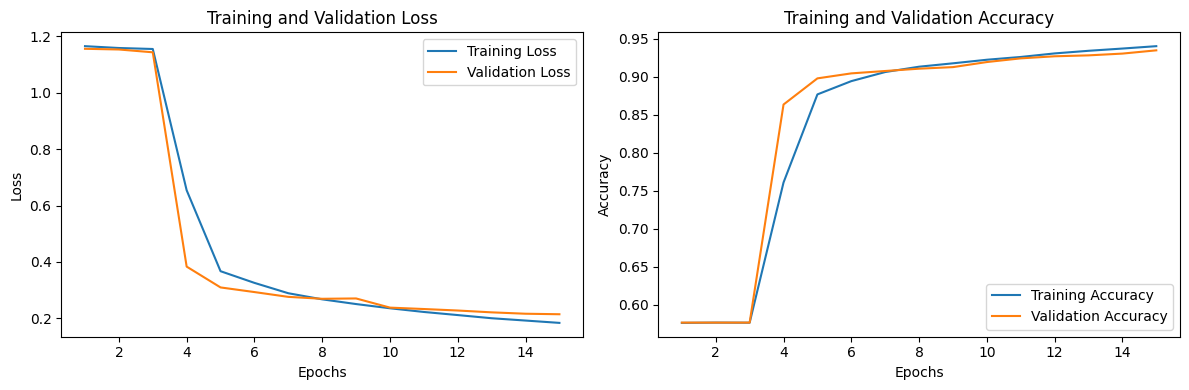

In [44]:
import matplotlib.pyplot as plt

# 그래프 그리기
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [45]:
# 예측을 위한 텍스트 전처리
def preprocess_text(text, tokenizer, vocab):
    text = tokenizer(text)
    text = [vocab[token] for token in text]  # 텍스트를 정수 인덱스로 변환
    text = torch.LongTensor(text).unsqueeze(0)  # 텐서로 변환
    return text

In [55]:
# 특정 값이 행을 선택하고 해당 열 값을 가져오기
filtered_rows = t_df[t_df['Status'] == 0]
selected_column_values = filtered_rows['Text'].sample().values[0]

print(selected_column_values)

Name is 'Web Request H&M Website'. Party name is 'Cheryl Juarez'. Main contact person is 'Cynthia Moody'. My company is 'True'. Reason is ''. I find this at 'Website Contact Form', and its priority is 'Normal'. Owner Party name is 'Jeremy Pearson'. Our sales unit is '', and territory is ''. Here is our note. 'To whom it may concern,

my name is Contact_First_Name Contact_Last_Name and I am the employee of the company Cheryl Juarez with the seat in Neu-Isenburg near Frankfurt/Main. After extensive research on the Internet, I came across your homepage.
 
For our plant, we need the following silicone waste in the long term:
 
1. HTV
2. RTV
3. LSR
4. VMQ

As I have already read some of your interesting articles about silicone tubing on your website, we would like to establish long-term business relationship with you if you can provide above mentioned items. If you would like more detailed information or have any questions, please feel free to let us know. We would be very pleased to receiv

In [56]:
# 예측
def predict_text(model, text, tokenizer, vocab, device):
    model.eval()

    # 텍스트 전처리
    text = preprocess_text(text, tokenizer, vocab)
    text = text.to(device)

    with torch.no_grad():
        output = model(text)

    # 예측 결과
    _, predicted_class = torch.max(output, 1)

    return predicted_class.item()

# 예측할 텍스트 입력
input_text = input("Input: ")

# 텍스트 예측
predicted_class = predict_text(model, input_text, tokenizer, vocab, device)

print("Predicted Class:", predicted_class)

Input: Name is 'Web Request H&M Website'. Party name is 'Cheryl Juarez'. Main contact person is 'Cynthia Moody'. My company is 'True'. Reason is ''. I find this at 'Website Contact Form', and its priority is 'Normal'. Owner Party name is 'Jeremy Pearson'. Our sales unit is '', and territory is ''. Here is our note. 'To whom it may concern,  my name is Contact_First_Name Contact_Last_Name and I am the employee of the company Cheryl Juarez with the seat in Neu-Isenburg near Frankfurt/Main. After extensive research on the Internet, I came across your homepage.   For our plant, we need the following silicone waste in the long term:   1. HTV 2. RTV 3. LSR 4. VMQ  As I have already read some of your interesting articles about silicone tubing on your website, we would like to establish long-term business relationship with you if you can provide above mentioned items. If you would like more detailed information or have any questions, please feel free to let us know. We would be very pleased to